### Tarea 1: 

Captura una o varias imágenes con monedas no solapadas. Tras visualizar la imagen, identifica de forma interactiva (por ejemplo haciendo clic en la imagen) una moneda de un valor determinado en la imagen (por ejemplo de 1€). Tras ello, la tarea se resuelve mostrando por pantalla el número de monedas y la cantidad de dinero presentes en la imagen. No hay restricciones sobre utilizar medidas geométricas o de color. ¿Qué problemas han observado?

Nota: Para establecer la correspondencia entre píxeles y milímetros, comentar que la moneda de un euro tiene un diámetro de 23.25 mm. la de 50 céntimos de 24.35, la de 20 céntimos de 22.25, etc. 

Extras: Considerar que la imagen pueda contener objetos que no son monedas y/o haya solape entre las monedas. Demo en vivo.

In [ ]:
#Librerías necesarias

import cv2  
import numpy as np
import matplotlib.pyplot as plt

#### Desglose:

1º: Visualizar la imagen e identificar una moneda de la imagen.
2º: Mostrar por pantalla el número de monedas y cantidad de dinero presente en la imagen.

##### Alternativa 1: findContours()
Búsqueda de contornos general para cualquier figura geométrica (mejor para la tarea 2)

Text(0.5, 1.0, 'findContours')

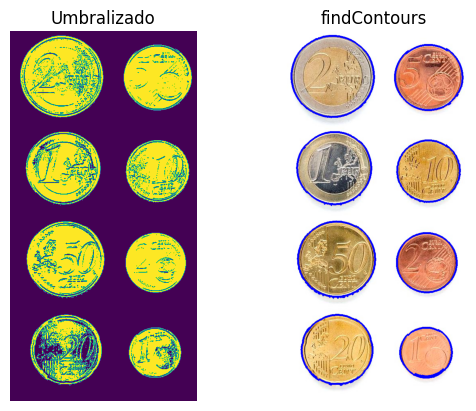

In [64]:
#Carga de la imagen de ejemplo con monedas
img = cv2.imread('Material_P3/Monedas.jpg') 

#Conversión a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Muestra de la imagen
#plt.subplot(141)
#plt.axis("off")
#plt.imshow(img_rgb) 
#plt.title('Original')


#Conversión de la imagen a tonos de gris
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Umbralizado binario invertido
th,img_th = cv2.threshold(img_gris,200,255,cv2.THRESH_BINARY_INV)

#Muestra de la imagen
plt.subplot(121)
plt.axis("off")
plt.imshow(img_th) 
plt.title('Umbralizado')

#Obtención de los contornos externos
contornos, hierarchy = cv2.findContours(
	img_th, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

#Dibuja sobre la imagen de entrada los contornos en azul (se ve mejor)
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,0,255), 3)

plt.subplot(122)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('findContours')



##### Alternativa 2: Transformada de Hough

Función dedicada para hallar circunferencias, más apta en este caso (posibilidad de ampliación) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


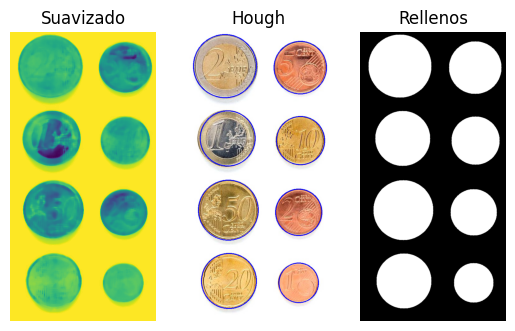

In [65]:
#-------------------------- Alternativa por Transformada de Hough -----------------------

#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Suavizado de imagen (elimina altas frecuencias)
pimg = cv2.medianBlur(gris, 11)

plt.subplot(131)
plt.axis("off")
plt.imshow(pimg) 
plt.title('Suavizado')

#Hallar círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=100, # valor del gradiente
        param2=50, # umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibujo sobre entrada e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
        x_coor, y_coor, det_radio = det
        cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
            int(det_radio),(0, 0, 255), 2)
        cv2.circle(img_cont,(int(x_coor), int(y_coor)),
            int(det_radio),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Hough')

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()